# Mathemtical Tools

# Table of Content 
1. “Approximation”
Regression and interpolation are among the most often used numerical techniques in finance.

2. “Convex Optimization”
A number of financial disciplines need tools for convex optimization (for instance, derivatives analytics when it comes to model calibration).

3. “Integration”
In particular, the valuation of financial (derivative) assets often boils down to the evaluation of integrals.

4. “Symbolic Computation”
Python provides with SymPy a powerful package for symbolic mathematics, for example, to solve (systems of) equations.

In [44]:
import numpy as np
from pylab import plt, mpl

In [45]:
def f(x):
    return np.sin(x) + 0.5 * x


This code defines a Python function create_plot and then uses it to generate a plot. Let's break down the code step by step:

Function Definition: create_plot
python
Copy code
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)
Parameters:
x: List of x-coordinates for data points.

y: List of y-coordinates for data points.

styles: List of line styles for the plot.

labels: List of labels for each data series.

axlabels: List of axis labels, where axlabels[0] is the x-axis label, and axlabels[1] is the y-axis label.

Function Body:
1. plt.figure(figsize=(10, 6)): Creates a new figure with a specified size (width=10, height=6) using the matplotlib.pyplot library.
2. for i in range(len(x)):: Iterates over the data series provided in x.
plt.plot(x[i], y[i], styles[i], label=labels[i]): Plots the i-th data series using the specified style and label.
plt.xlabel(axlabels[0]): Sets the x-axis label.
plt.ylabel(axlabels[1]): Sets the y-axis label.
3. plt.legend(loc=0): Adds a legend to the plot, with loc=0 indicating an automatic placement.

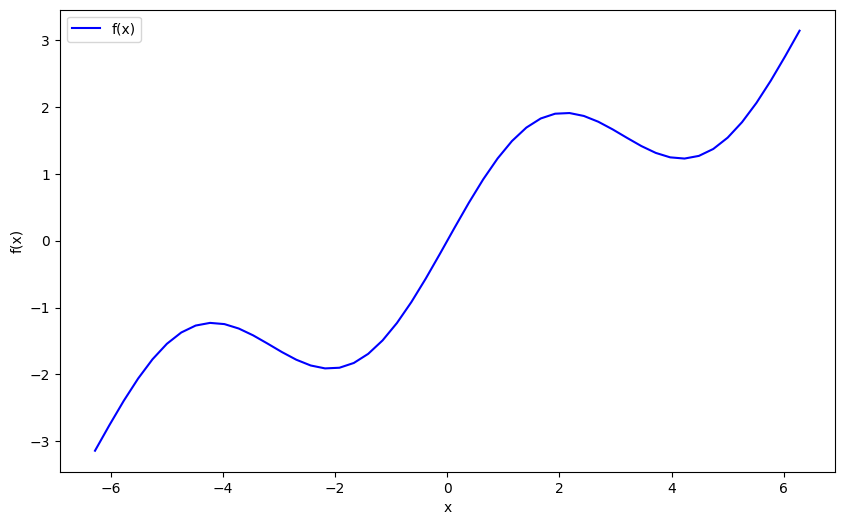

In [46]:
def create_plot(x, y, styles, labels, axlabels):
            plt.figure(figsize=(10, 6))
            for i in range(len(x)):
                plt.plot(x[i], y[i], styles[i], label=labels[i])
                plt.xlabel(axlabels[0])
                plt.ylabel(axlabels[1])
            plt.legend(loc=0)

x = np.linspace(-2 * np.pi, 2 * np.pi, 50)
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

Monomials as basis functions
One of the simplest cases is to take monomials as basis functions—i.e., 
. In such a case, NumPy has built-in functions for both the determination of the optimal parameters (namely, np.polyfit()) and the evaluation of the approximation given a set of input values (namely, np.polyval()).

ParameterDescription
1.x
x coordinates (independent variable values)

2.y
y coordinates (dependent variable values)

3.deg
Degree of the fitting polynomial

4.full
If True, returns diagnostic information in addition

5.w
Weights to apply to the y coordinates

6.cov

If True, returns covariance matrix in addition

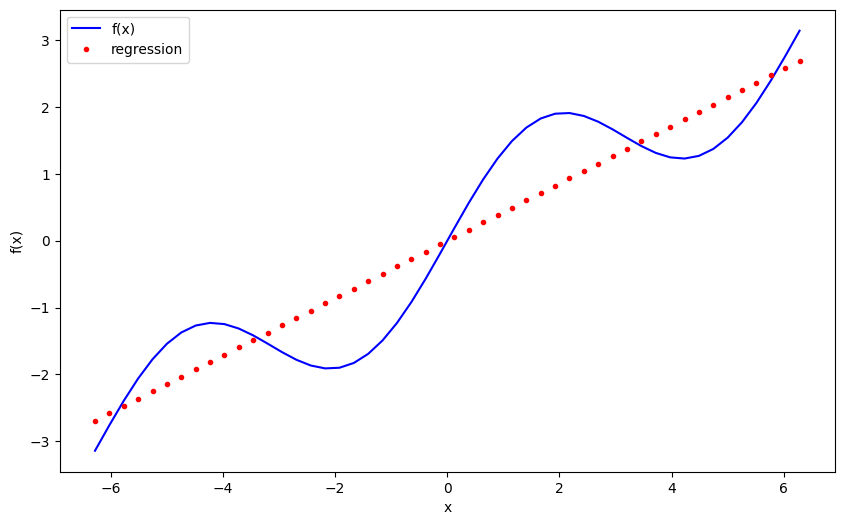

In [47]:
# Linear Regression 
res = np.polyfit(x, f(x), deg=1, full=True)
res
ry = np.polyval(res[0], x)
create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

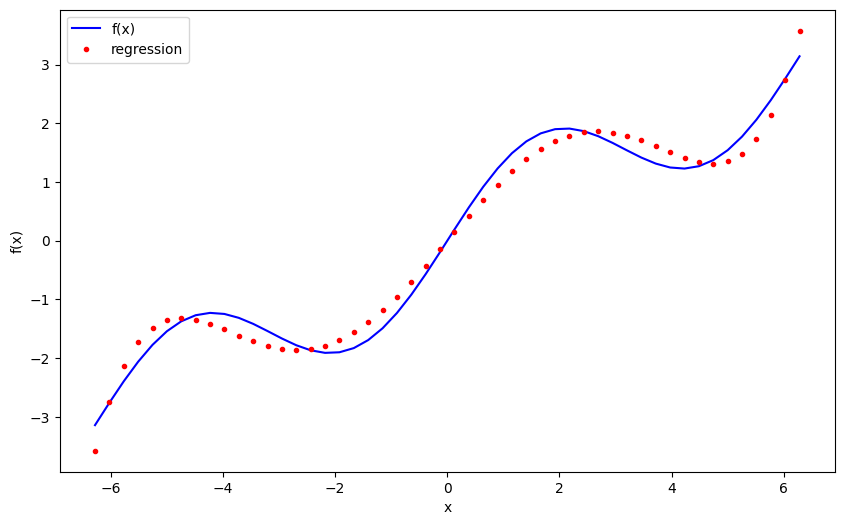

In [48]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)
create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

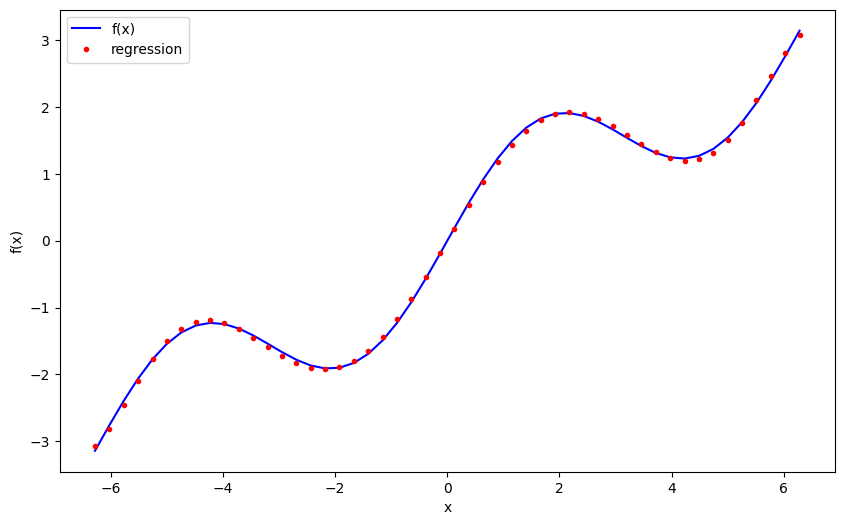

In [49]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)
np.allclose(f(x), ry)
np.mean((f(x) - ry) ** 2)
create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])


# Individual Basis Functions

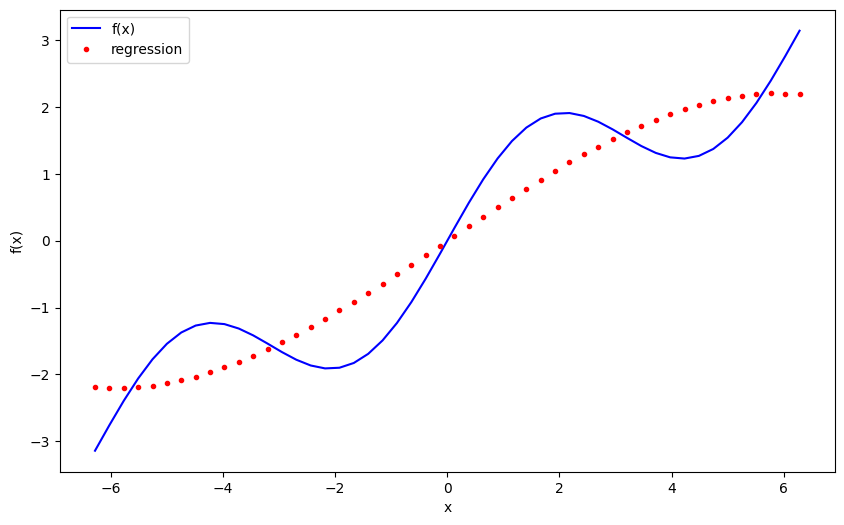

In [50]:
matrix = np.zeros((3+1,len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1
reg = np.linalg.lstsq(matrix.T, f(x),rcond=None)[0]
reg.round(4)
ry = np.dot(reg,matrix)
create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

Adding a sin part in the function.

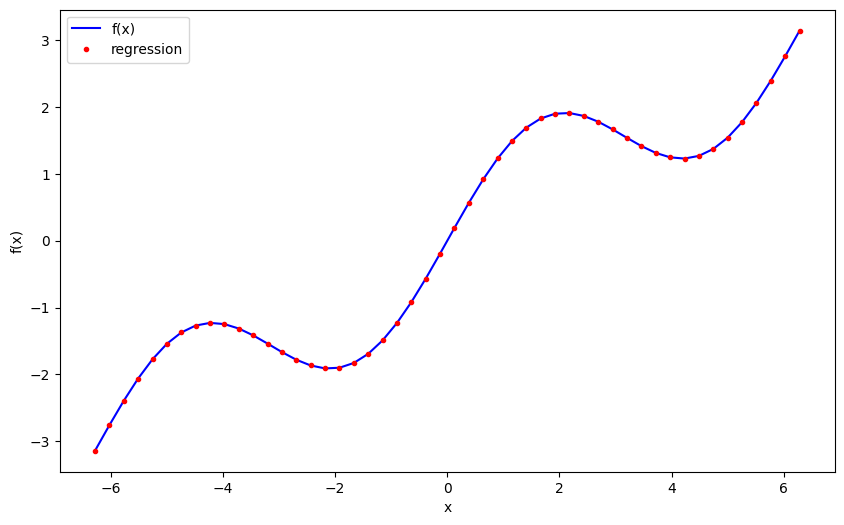

In [51]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T,f(x),rcond =None)[0]
reg.round(4)
ry = np.dot(reg,matrix)
np.allclose(f(x),ry)    
np.mean((f(x)-ry)**2)
create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

# Noisy Data 
Regression can cope equally well with noisy data, be it data from simulation or from (nonperfect) measurements.

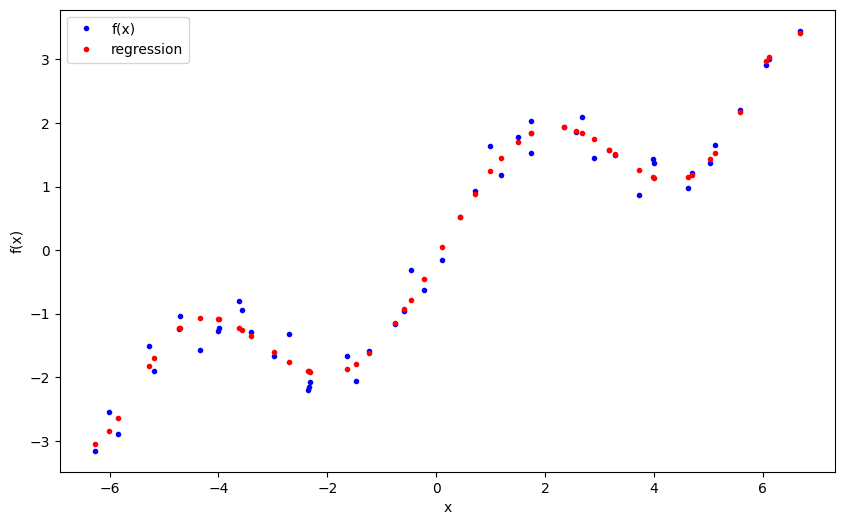

In [52]:
# new deterministic x calues 
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)
create_plot([xn, xn], [yn, ry], ['b.', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

Note, original regression results are closer to the orignal function than the noisy data points

# Multiple Dimensions 
Another convenient characteristic of the least-squares regression approach is that it carries over to multiple dimensions without too many modifications.

In [53]:
def fm(p):
             x, y = p
             return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

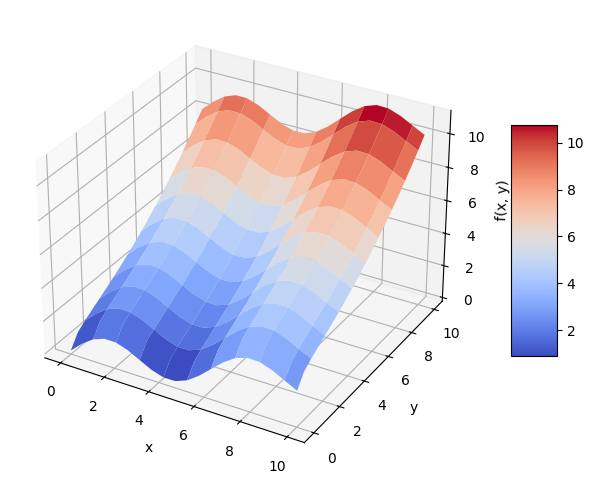

In [54]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)

Z = fm((X, Y))
x = X.flatten()
y = Y.flatten()
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm', linewidth=0.5,
                       antialiased=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

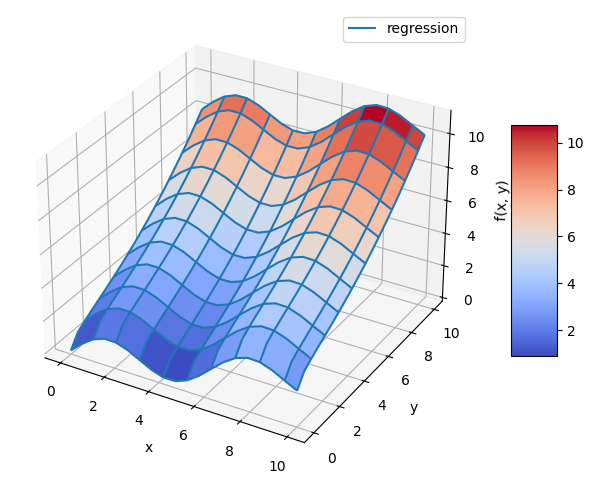

In [55]:
from mpl_toolkits.mplot3d import Axes3D

# Create a matrix with specific transformations of x and y
matrix = np.zeros((len(x), 7))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

# Perform a least squares regression
reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]

# Apply the regression results to the matrix
RZ = np.dot(matrix, reg).reshape((20, 20))

# Plot the original function and the regression result
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                        cmap=mpl.cm.coolwarm, linewidth=0.5,
                        antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf1, shrink=0.5, aspect=5)

Least-squares regression approaches have multiple areas of application, including simple function approximation and function approximation based on noisy or unsorted data. These approaches can be applied to one-dimensional as well as multidimensional problems. Due to the underlying mathematics, the application is “almost always the same.”

# Interpolation
Compared to regression, interpolation (e.g., with cubic splines) is more involved mathematically. It is also limited to low-dimensional problems. Given an ordered set of observation points (ordered in the x dimension), the basic idea is to do a regression between two neighboring data points in such a way that not only are the data points perfectly matched by the resulting piecewise-defined interpolation function, but also the function is continuously differentiable at the data points. Continuous differentiability requires at least interpolation of degree 3—i.e., with cubic splines.

Continuous differentiability refers to the property of a function being differentiable not just at isolated points but throughout its entire domain, and furthermore, having derivatives that are themselves continuous functions. A function is continuously differentiable if its derivative exists and is a continuous function.

In the context of interpolation using cubic splines, continuous differentiability is a desirable property because it ensures smooth transitions between adjacent segments of the piecewise-defined interpolation function. Specifically:

Differentiability:

A function is differentiable at a point if it has a derivative at that point. The derivative represents the rate of change of the function at that point. If a function is differentiable at all points in its domain, we say it is differentiable everywhere.
Continuity of Derivatives:

If a function is continuously differentiable, not only does it have derivatives at all points, but these derivatives are also continuous functions. This means that small changes in the input variable result in small and continuous changes in the rate of change of the function.
In the case of cubic splines used for interpolation, requiring continuous differentiability ensures that not only does the interpolation function pass through each data point but also that its slope (first derivative) and curvature (second derivative) are continuous at those points. This leads to a smoother and visually appealing interpolation.

The use of cubic splines, in particular, ensures continuous differentiability because each cubic spline segment is a cubic polynomial, and cubic polynomials are twice continuously differentiable (i.e., they have continuous first and second derivatives). By requiring continuity of the first and second derivatives at the breakpoints (data points), cubic splines achieve continuous differentiability over the entire range of the interpolation.

In summary, continuous differentiability in the context of interpolation with cubic splines ensures not only a good fit to the data points but also smooth transitions between adjacent segments of the piecewise-defined interpolation function.

## Parameters for `scipy.interpolate.splrep()`

| Parameter     | Description                                           |
| ------------- | ----------------------------------------------------- |
| **x**         | (Ordered) x coordinates (independent variable values) |
| **y**         | (x-ordered) y coordinates (dependent variable values) |
| **w**         | Weights to apply to the y coordinates                 |
| **xb, xe**    | Interval to fit; if None then [x[0], x[-1]]           |
| **k**         | Order of the spline fit (1 ≤ k ≤ 5)                   |
| **s**         | Smoothing factor (the larger, the more smoothing)     |
| **full_output** | If True, returns additional output                   |
| **quiet**     | If True, suppresses messages                           |

## Parameters for `scipy.interpolate.splev()`

| Parameter     | Description                                           |
| ------------- | ----------------------------------------------------- |
| **x**         | (Ordered) x coordinates (independent variable values) |
| **tck**       | Sequence of length 3 returned by splrep() (knots, coefficients, degree) |
| **der**       | Order of derivative (0 for function, 1 for first derivative) |
| **ext**       | Behavior if x not in knot sequence (0 = extrapolate, 1 = return 0, 2 = raise ValueError) |


True


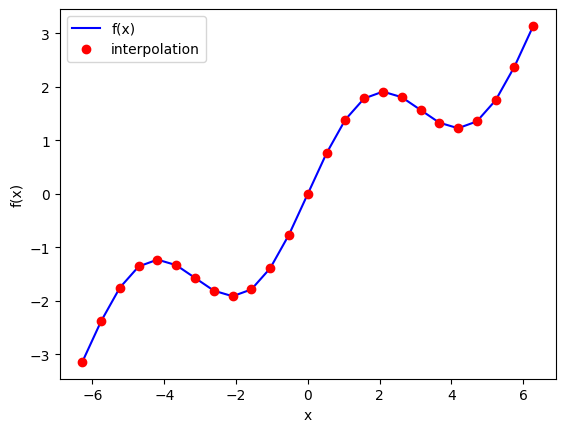

In [56]:
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt

# Define the function and the x values
def f(x):
    return np.sin(x) + 0.5 * x

x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

# Perform the spline interpolation
ipo = spi.splrep(x, f(x), k=1)
iy = spi.splev(x, ipo)

# Check if the interpolated values are close to the actual function values
print(np.allclose(f(x), iy))

# Define a function to create the plot
def create_plot(x_vals, y_vals, styles, labels, axis_labels):
    for x, y, style, label in zip(x_vals, y_vals, styles, labels):
        plt.plot(x, y, style, label=label)
    plt.xlabel(axis_labels[0])
    plt.ylabel(axis_labels[1])
    plt.legend()
    plt.show()

# Create the plot
create_plot([x, x], [f(x), iy], ['b', 'ro'], ['f(x)', 'interpolation'], ['x', 'f(x)'])

Spline interpolation is often used in finance to generate estimates for dependent values of independent data points not included in the original observations. To this end, the next example picks a much smaller interval and has a closer look at the interpolated values with the linear splines

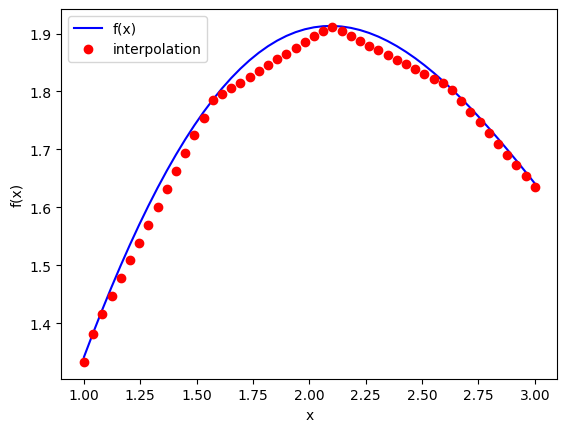

In [57]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
                     ['f(x)', 'interpolation'], ['x', 'f(x)'])

## Convex Optimization in Finance and Economics

In finance and economics, convex optimization plays a crucial role, providing a mathematical framework for solving optimization problems with well-defined properties and efficient algorithms. Examples of its application include:

### Calibration of Option Pricing Models

The calibration of option pricing models to market data involves adjusting model parameters to align with observed market prices. Convex optimization techniques are employed to find the optimal set of parameters that minimizes the difference between model prices and market prices.

### Optimization of an Agent’s Utility Function

In economics, agents often make decisions to maximize their utility, representing their preferences or well-being. Convex optimization is applied to find the optimal decision that maximizes the agent's utility function.

### Example Function: `fm()`

As an illustrative example, consider the function `fm()`. While the details of this function are not provided here, it serves as a representative example of a function that might be optimized using convex optimization techniques in the context of finance and economics.

Convex optimization proves valuable in tackling optimization challenges within these domains, contributing to more effective decision-making and model calibration.


In [58]:
def fm(p):
    x, y = p 
    return (np.sin(x) + 0.05 * x ** 2  + np.sin(y) + 0.05 *y **2)


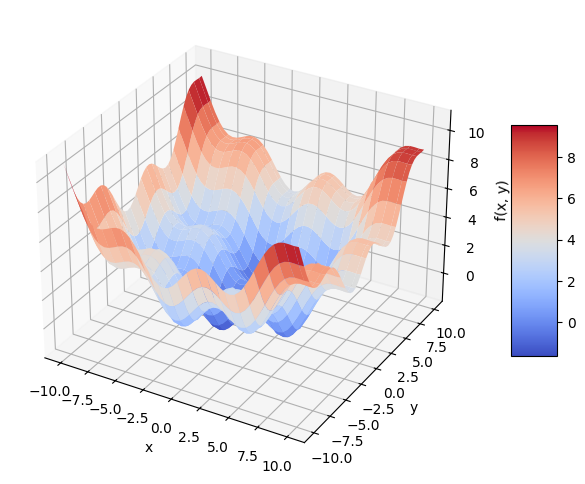

In [59]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm', linewidth=0.5,
                       antialiased=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

 Visual inspection already reveals that this function has multiple local minima. The existence of a global minimum cannot really be confirmed by this particular graphical representation, but it seems to exist:

## Global Optimization

In the following sections, both a global minimization approach and a local one are implemented. The functions `scipy.optimize.brute()` (`sco.brute()`) and `scipy.optimize.fmin()` (`sco.fmin()`) are applied, and these functions are part of the `scipy.optimize` module.

To gain insight into the minimization procedures and understand what happens behind the scenes, the following code enhances the original function. It introduces an option to output the current parameter values along with the corresponding function value. This modification allows us to keep track of all relevant information throughout the optimization procedure.


In [60]:
import scipy.optimize as sco

Brutoe Force optmization

In [61]:
def fo(p):
             x, y = p
             z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
             if output == True:
                 print('%8.4f | %8.4f | %8.4f' % (x, y, z))  
             return z
output = True 
sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)  

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

In [62]:
output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
opt1
fm(opt1)

-1.7748994599769203

The optimal parameter values are now x = y = –1.4 and the minimal function value for the global minimization is about –1.7749

# Local Optmization
The local convex optimization that follows draws on the results from the global optimization. The function sco.fmin() takes as input the function to minimize and the starting parameter values. Optional parameter values are the input parameter tolerance and function value tolerance, as well as the maximum number of iterations and function calls

In [63]:
output = True 
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2
fm(opt2)

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757


/var/folders/2b/n21s51zs701f5bnpdk36200m0000gn/T/ipykernel_4645/1421716464.py:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)


-1.7757246992239009

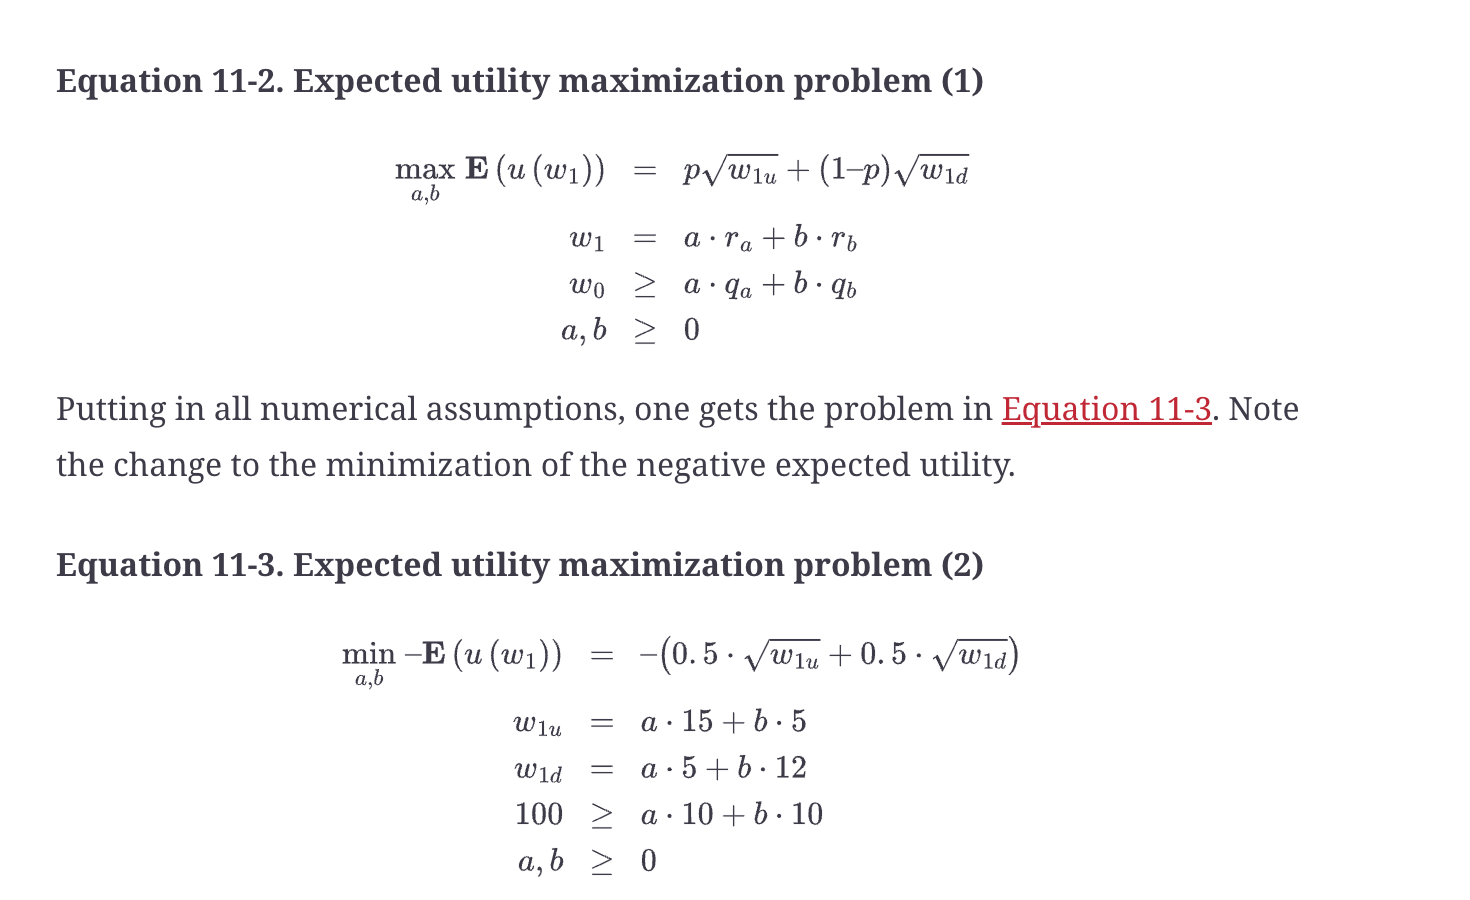

In [64]:
import math
import scipy.optimize as sco

# Define the utility function
def Eu(p):  
    s, b = p
    return -(0.5 * math.sqrt(s * 15 + b * 5) +
             0.5 * math.sqrt(s * 5 + b * 12))

# Define the constraint
cons = ({'type': 'ineq',
         'fun': lambda p: 100 - p[0] * 10 - p[1] * 10})

# Define the bounds
bnds = ((0, 1000), (0, 1000))

# Perform the optimization
result = sco.minimize(Eu, [5, 5], method='SLSQP',
                      bounds=bnds, constraints=cons)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -9.700883611487832
       x: [ 8.025e+00  1.975e+00]
     nit: 5
     jac: [-4.851e-01 -4.849e-01]
    nfev: 16
    njev: 5

In [66]:
# Optimal Parametuer Values (optimal portfolio)
result 
# NEgative minimum function value as optima solution value 
result['x']
-result['fun']
# budget constraint is binding; all wealth is invested
np.dot(result['x'], [10, 10])

100.0

# Integration 
Especially when it comes to valuation and option pricing, integration is an important mathematical tool. This stems from the fact that risk-neutral values of derivatives can be expressed in general as the discounted expectation of their payoff under the risk-neutral or martingale measure

In [ ]:
import scipy.integrate as slice
def f(x):
    return np.sin(x) + 0.5 * x 

Integration intervall = [0.5,9.5]

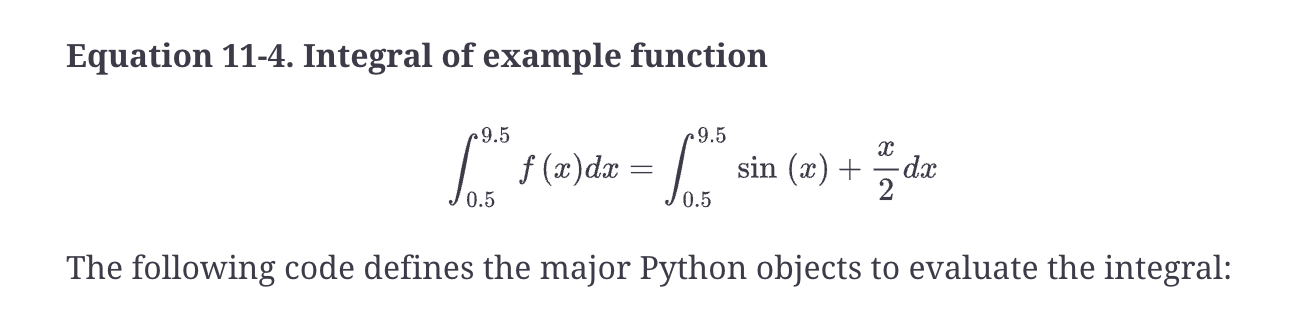

In [68]:
x = np.linspace(0,10)
y = f(x)
a = 0.5
b = 9.5 
Ix = np.linspace(a, b)
Iy = f(Ix)

In [69]:
from matplotlib.patches import Polygon

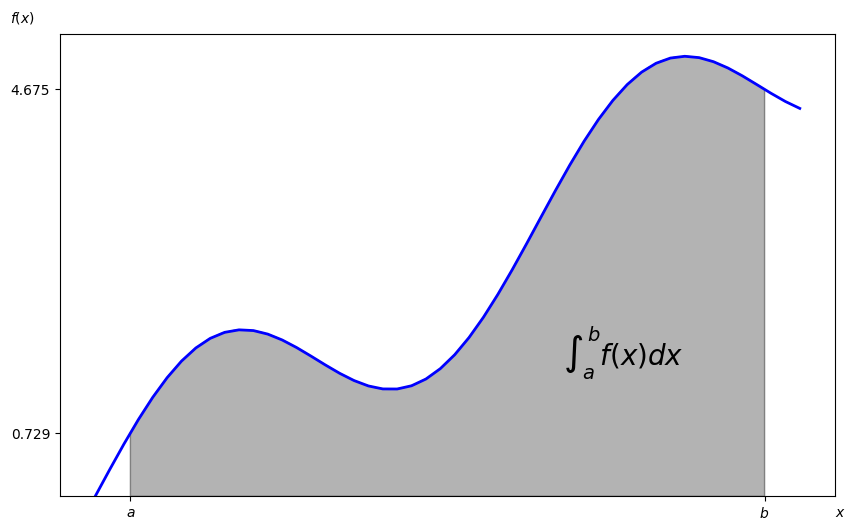

In [70]:
# Creating a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the function curve with blue color and linewidth of 2
plt.plot(x, y, 'b', linewidth=2)

# Setting the y-axis limit to start from 0
plt.ylim(bottom=0)

# Generating x and y values for the shaded area representing the integral
Ix = np.linspace(a, b)
Iy = f(Ix)

# Creating vertices for the shaded polygon (integral area)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]

# Creating a polygon patch for the shaded area with light gray color
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')

# Adding the shaded area to the plot
ax.add_patch(poly)

# Adding text indicating the integral expression in the middle of the shaded area
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)

# Adding labels for x and y axes
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

# Setting x-axis ticks at points a and b
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))

# Setting y-axis ticks at f(a) and f(b)
ax.set_yticks([f(a), f(b)])
